In [1]:
import numpy as np
import torch
from torch import nn
import math
import torch.nn.functional as F
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from numpy import array
from scipy.linalg import svd
from numpy import diag
import matplotlib.pyplot as plt

In [2]:
MNIST_train = datasets.MNIST(root='./data', train = True , download=True, transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),torchvision.transforms.Normalize((0.1307,), (0.3081,))]))
MNIST_test = datasets.MNIST(root='./data', train = False ,download=True, transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),torchvision.transforms.Normalize((0.1307,), (0.3081,))]))

In [3]:
train_set, val_set = torch.utils.data.random_split(MNIST_train, [50000, 10000])

train_data = torch.utils.data.DataLoader(train_set, batch_size=100,shuffle=True)

val_data = torch.utils.data.DataLoader(val_set, batch_size=100,shuffle=True)

test_data = torch.utils.data.DataLoader(MNIST_test, batch_size=100,shuffle=True)

In [4]:
import torch
torch.cuda.is_available()

True

In [5]:
# cpu-gpu
a = torch.randn((3, 4))
print(a.device)

device = torch.device("cuda")
a = a.to(device)
print(a.device)

# a more generic code
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

cpu
cuda:0


In [75]:
data = next(iter(train_data))[0]

In [76]:
def PCA(data, k):
    batch_size = data.shape[0]
    data = data.reshape(batch_size,data.shape[2]*data.shape[3])
    print(data.shape)
    U,S,V = torch.linalg.svd(data, full_matrices = False)
    approx = (U @ torch.diag(S))[:, :k] @ V[:k]
    return approx

In [77]:
recon = PCA(data,30)

torch.Size([100, 784])


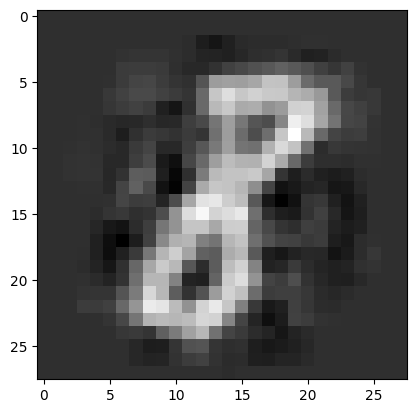

In [78]:
plt.imshow(recon[0,:].reshape(28,28),cmap='gray')

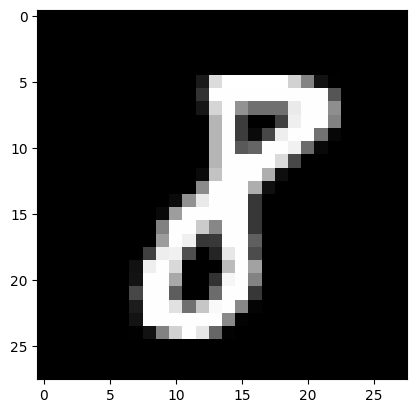

In [79]:
plt.imshow(data[0].reshape(28,28),cmap='gray')

In [21]:
class MNIST_AE(nn.Module):
    def __init__(self):
        super(MNIST_AE, self).__init__()
        self.encoder = nn.Sequential(
        nn.Linear(784,512),
        nn.ReLU(),
        nn.Linear(512,256),
        nn.ReLU(),
        nn.Linear(256,128),
        nn.ReLU(),
        nn.Linear(128,30),
        nn.ReLU())
        self.decoder =nn.Sequential(
        nn.Linear(30,128),
        nn.ReLU(),
        nn.Linear(128,256),
        nn.ReLU(),
        nn.Linear(256,784),
        nn.ReLU())

    def forward(self,x):
        x=self.encoder(x)
        x=self.decoder(x)
        return x    

In [68]:
LearningRate=0.0003
epochs=10
model=MNIST_AE()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LearningRate)

In [81]:
def train(model,train_data,valid_data,epoch = 10):
    model.to(device)
    trainloss = []
    validloss = []

    for epoch in range(epochs):
        for images, labels in train_data:
            images = images.to(device)
            images = images.reshape(100,784)
            outputs = model(images.float())
            loss = criterion(outputs, images)
            trainloss.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        val_loss = 0
        iteration = 0
        for images, labels in valid_data:
            
            images = images.to(device)
            images = images.reshape(100,784)
            outputs = model(images.float())
            loss = criterion(outputs, images)
            val_loss+=loss.item()
            iteration+=1
        validloss.append(val_loss/iteration)
        print('Epoch',epoch+1,' over current validation loss:',validloss[-1])
    return model,trainloss,validloss

In [82]:
learned_models = {}

In [83]:
learned_models['MNIST_PCA_vs_AutoEncoder'] = train(model,train_data,val_data)

Epoch 1  over current validation loss: 0.4971572557091713
Epoch 2  over current validation loss: 0.43772098124027253
Epoch 3  over current validation loss: 0.40753624141216277
Epoch 4  over current validation loss: 0.39144553124904635
Epoch 5  over current validation loss: 0.3796533235907555
Epoch 6  over current validation loss: 0.37140050023794174
Epoch 7  over current validation loss: 0.3662433338165283
Epoch 8  over current validation loss: 0.36251472622156145
Epoch 9  over current validation loss: 0.3586424577236176
Epoch 10  over current validation loss: 0.35599857360124587


C:\Users\ariha\AppData\Local\Temp\ipykernel_8552\784485322.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='#666666', linestyle='-')
C:\Users\ariha\AppData\Local\Temp\ipykernel_8552\784485322.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)


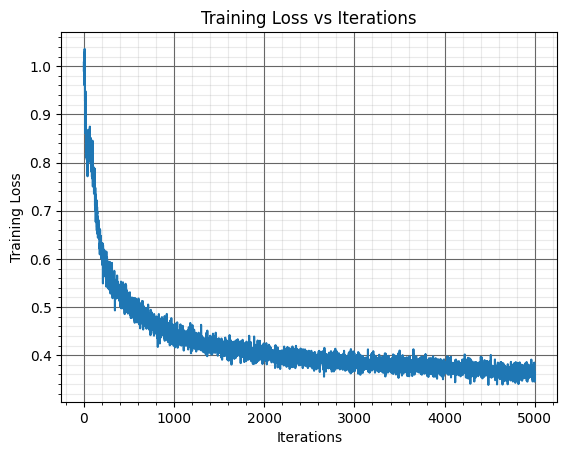

In [46]:
plt.figure(1)
xtrainloss=np.arange(len(trainingloss_list))
plt.plot(xtrainloss,trainingloss_list)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Iterations')
plt.show()

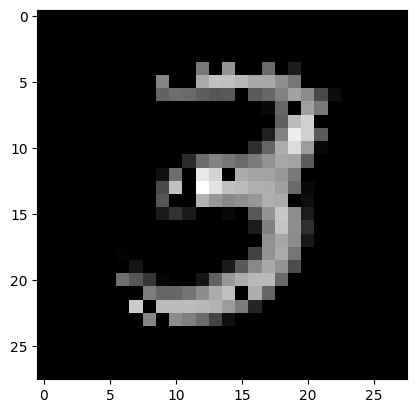

In [49]:
plt.imshow(outputs.detach().cpu().numpy()[1].reshape(28,28),cmap='gray')

In [ ]:
class AE2(nn.Module):
    def __init__(self,hidsize):
        super(AE2, self).__init__()
        self.hidsize=hidsize
        self.encoder = nn.Sequential(
        nn.Linear(784,hidsize),
        nn.ReLU())
        self.decoder =nn.Sequential(
        nn.Linear(hidsize,784),
        nn.ReLU())

    def forward(self,x):
        x=self.encoder(x)
        x=self.decoder(x)
        return x    